# Hierarchical Clustering


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris_1.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


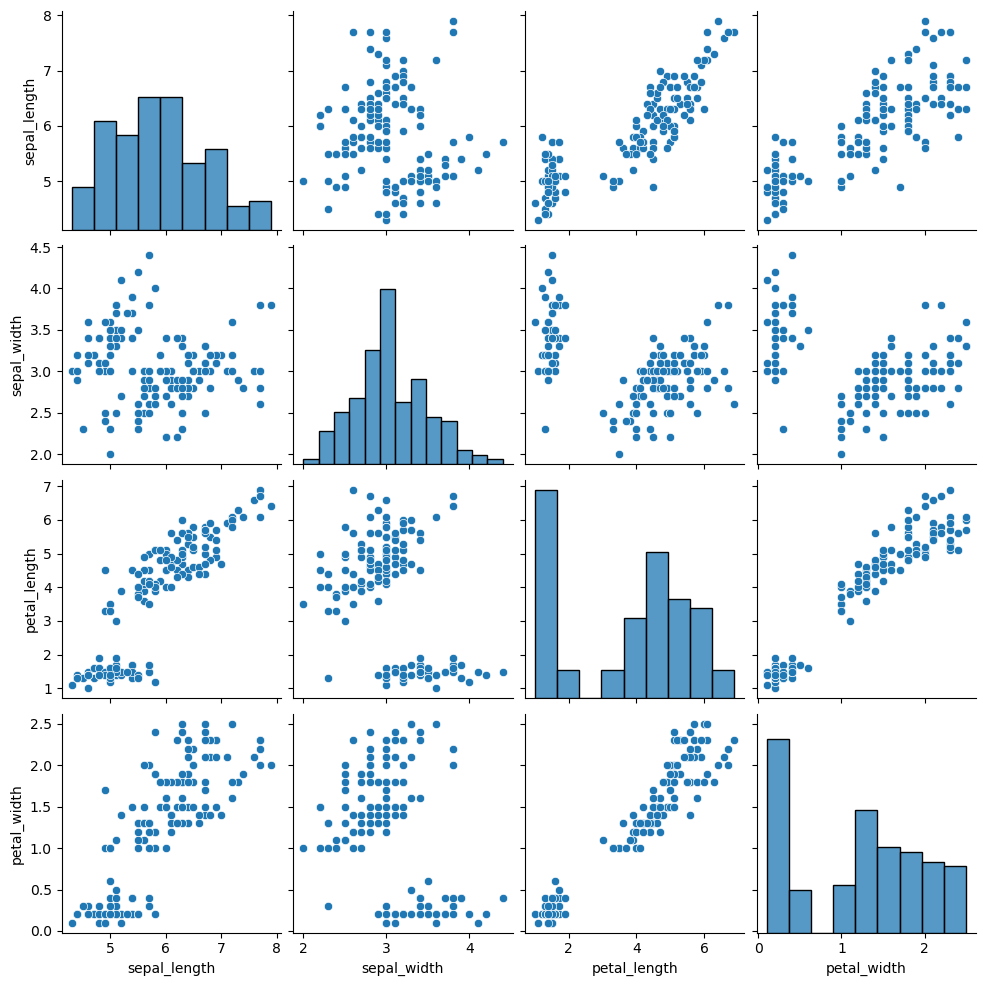

In [6]:
sns.pairplot(df);

## Scaling Data

Yaptık ve yapmadan baktık yapmadan daha iyi olduğunu müşahede ettik o yüzden gerek görmedik 

## Hopkins Test
Hopkins testi, veri kümesinin düzgün (uniform) bir dağılıma sahip olup olmadığını tahmin etmek için kullanılan bir istatistiksel testtir.

Hopkins skoru 0'a yaklaşıyorsa, bu, veri kümesinin düzgün bir dağılıma sahip olmadığı anlamına gelir. Bu durumda, veriyi sınıflandırmak için kümeleme (clustering) yöntemleri kullanmak yararlı olabilir.

Ancak Hopkins skoru belirli bir değerin (örneğin 0.3) üzerindeyse, bu, veri kümesinin düzgün bir dağılıma sahip olduğu anlamına gelir. Bu tür bir durumda, kümeleme yöntemlerini kullanmak pek anlamlı olmayabilir.

Özetle, Hopkins testi, bir veri kümesinin düzgün bir dağılım gösterip göstermediğini ve bu bağlamda kümelemenin uygun olup olmadığını değerlendirmenizi sağlar.

In [7]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [8]:
X=df.copy()

In [9]:
hopkins(X, X.shape[0])

0.16152786855826493

## Dendogram

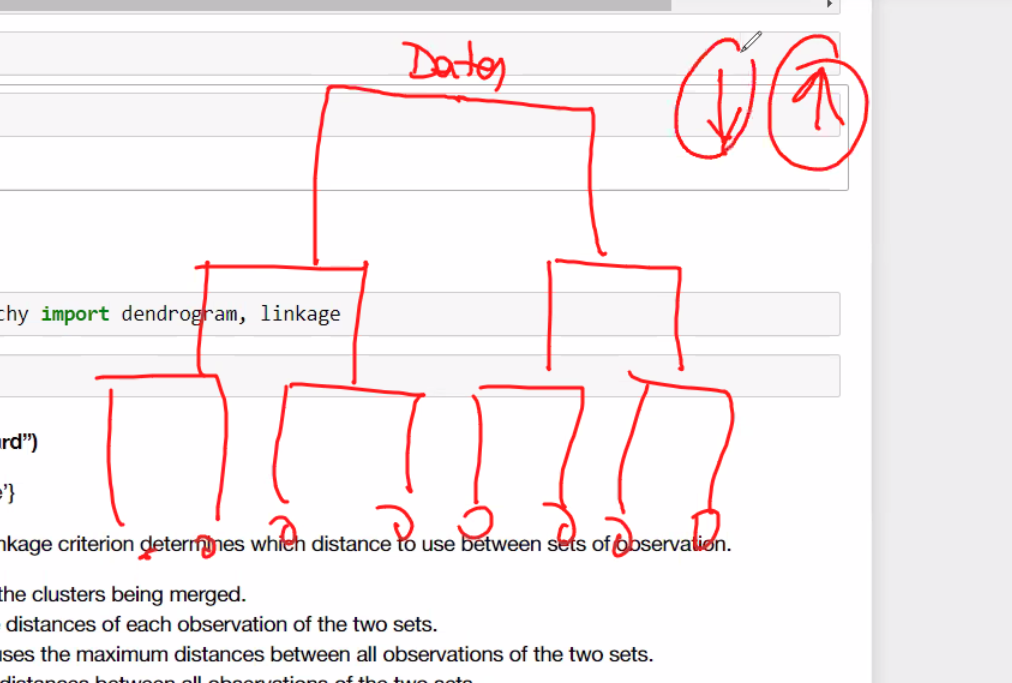

In [10]:
# şekil olarak tree base modellere benzer
# herbir gözleme kadar iner
# 4 çeşittir

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
#£dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [13]:
hc_ward = linkage (y= X, method ="ward") #varyansa göre --> varyansı fazla etkilemediği kümeye gidiyor
hc_complete = linkage (X, "complete") #en uzak noktaya göre --> gözlem her iki kümenin en uzak noktasın ölçüp, en yakın olana atıyor kendini 
hc_average = linkage (X, "average") #ortalamaya göre
hc_single= linkage(X ,"single") #en yakın noktaya göre

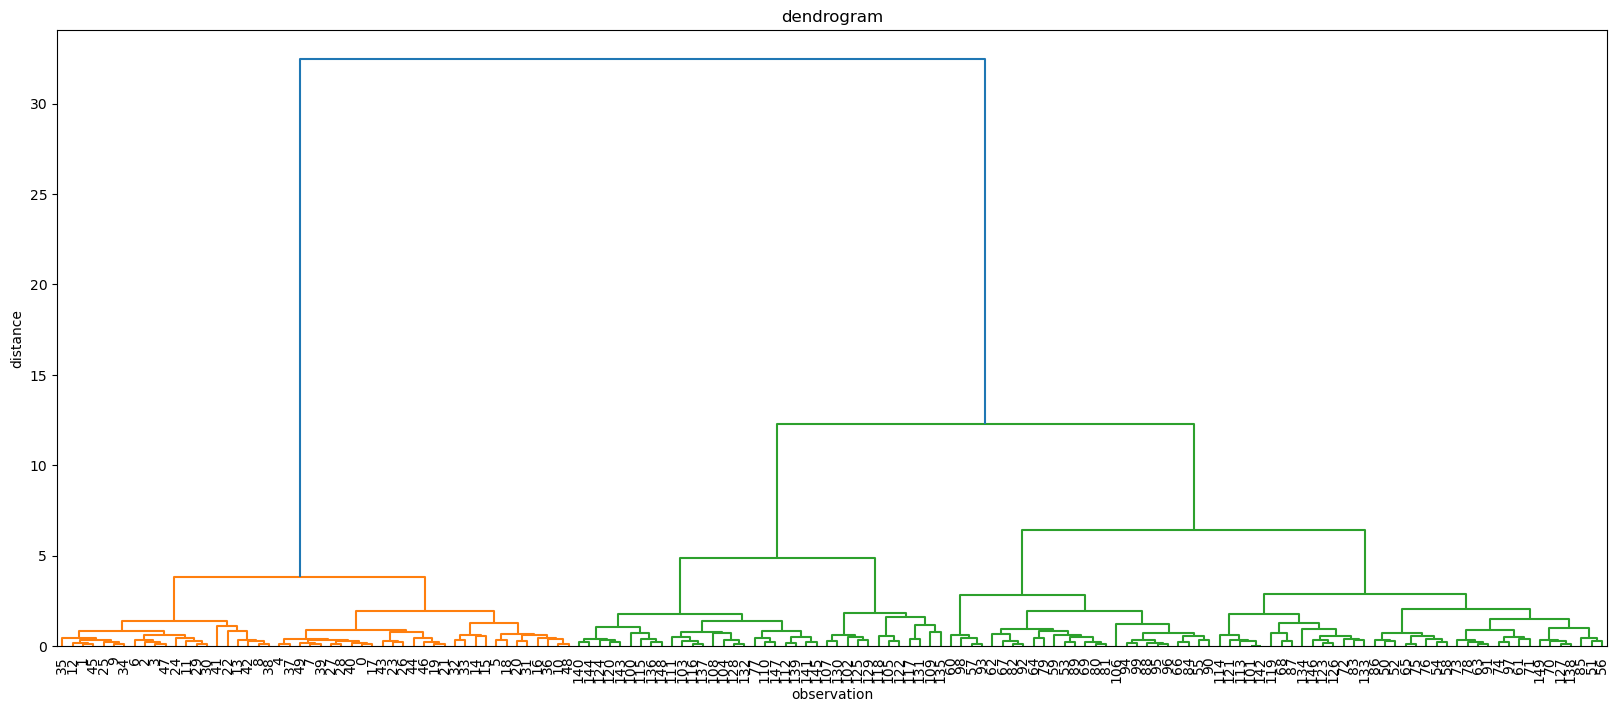

In [14]:
plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);

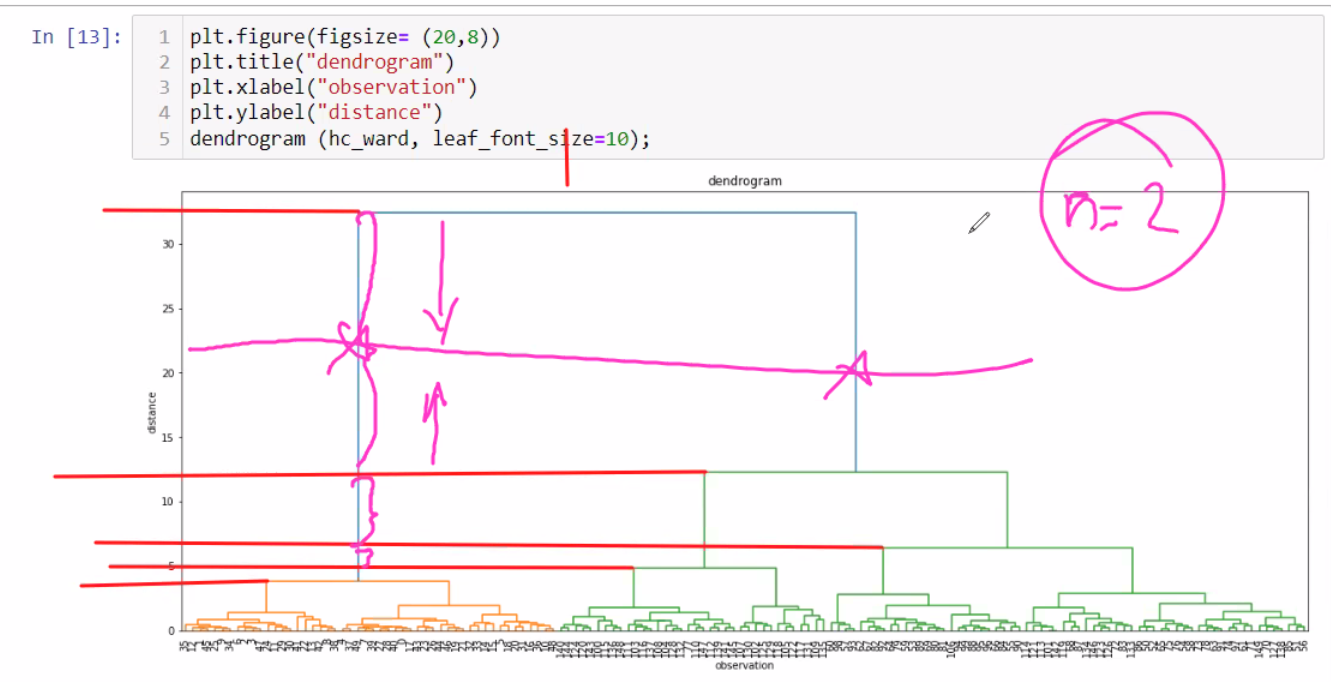

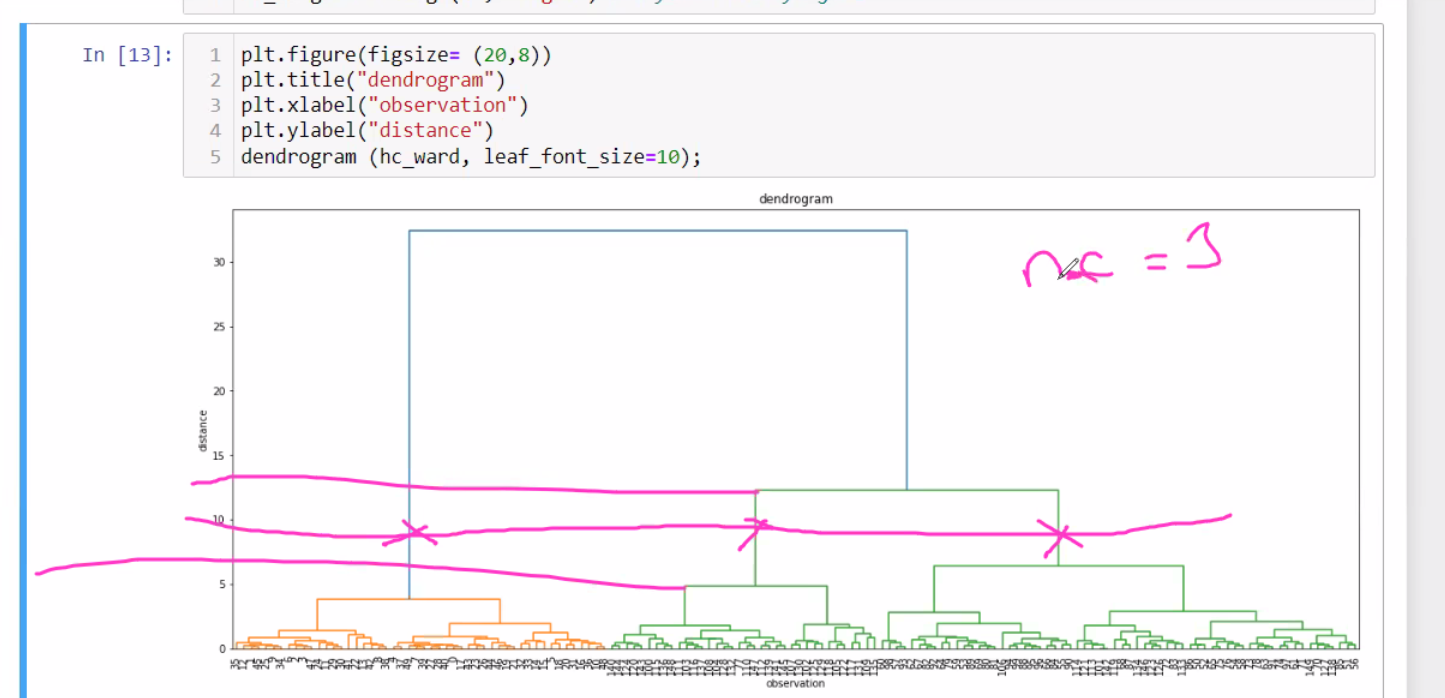

In [15]:
# mavi renkler tercih ettiği küme sayısını gösterir
# en geniş aralığı alıyor ve tam ortasından bir çizgi çekip kaç noktada kesiyorsa o kadar class var diyor
# N_cluster=2
  # Mesafeleri olcerek en uzun cizginin tam ortasindan bir cizgi cekerek, onun kestigi nokta kac tane ise o kadar boluyor.

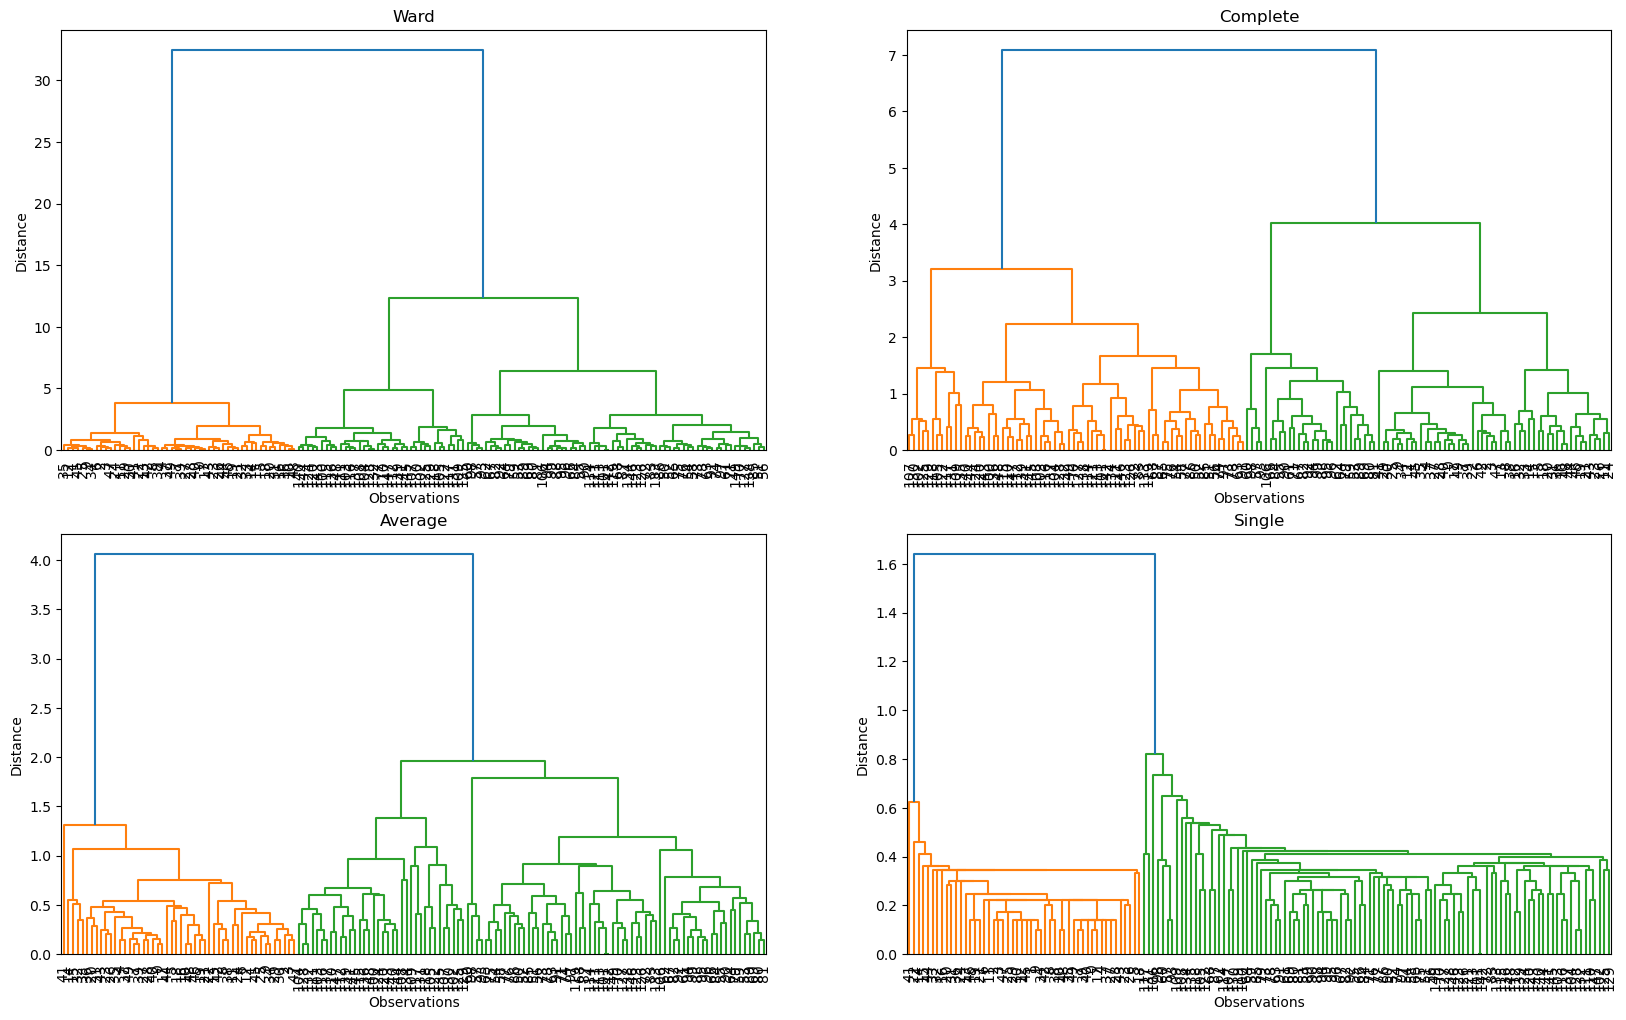

In [16]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [17]:
# hepsinde mavi çizgiyi 2 yerde kestiği için 2 class tır diyor.

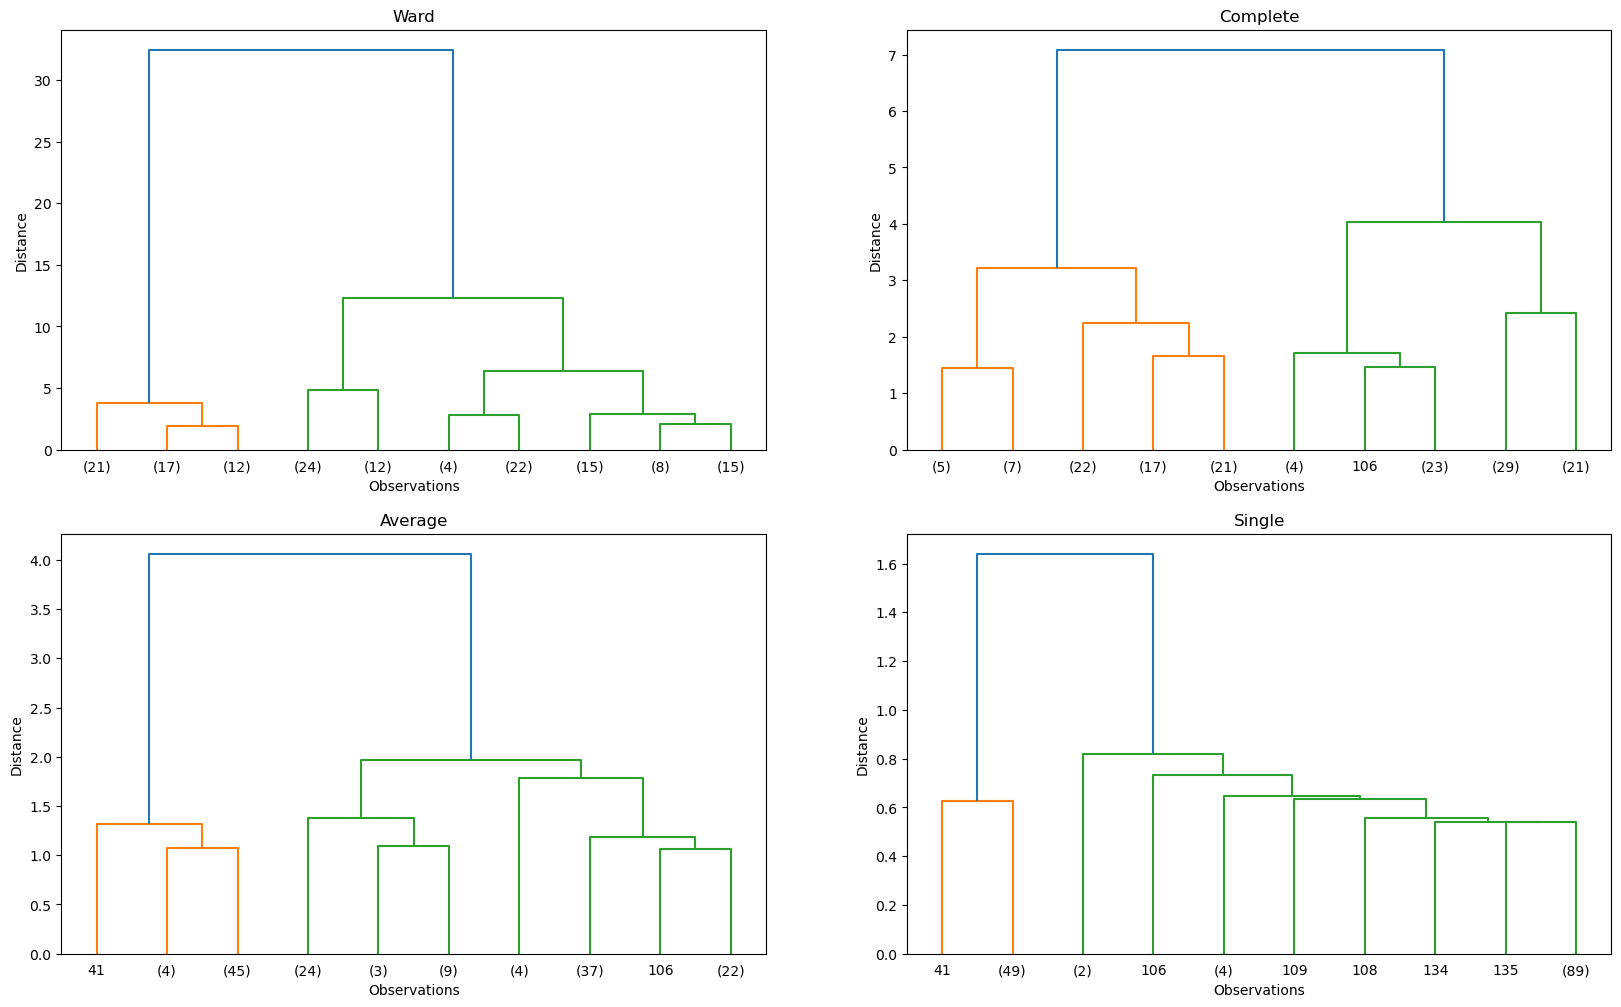

In [18]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p en son dllarda oluşacak küme sayısı
# truncate_mode='lastp'  ?????

In [19]:
# üstteki şekille daha temiz görüntü elde ediyorum
# en altta yazan rakamlar kaç tane daha class old. gösteriyor
# truncate_mode='lastp' , p=10 ile 10 taneye kadar göster diyorum.(soldan sağa doğru sayınca 10 yapıyor)

## Hierarchical Clustering (Agglomerative)

In [20]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

Silhouette analizi, kümeleme performansını değerlendirmek için kullanılan bir metriktir. Küme içi benzerliği ve kümeler arası benzerliği karşılaştırarak, kümelerin ne kadar iyi ayrıldığını gösterir. Silhouette değeri, her veri noktası için hesaplanır ve bu değerlerin ortalaması alınarak genel bir kümeleme kalitesi ölçümü elde edilir.

Silhouette değeri -1 ile 1 arasında değişir:

1: i veri noktası kendi kümseinde iyi yerleştirilmiş ve diğer kümelerden uzakta demektir.

0: i veri noktası iki kümse arasında bir sınıra yakın demektir.

−1: i veri noktası yanlış bir kümseye atanmış demektir.

bu değerlerin "eşik" değerleri kesin bir şekilde belirlenmemiştir. Ancak, pratikte, ortalama silhouette değerinin yüksek olması (genellikle 0.5'ten büyük) kümelenmenin iyi olduğunu gösterirken, düşük değerler (genellikle 0.25'ten düşük) kümelenmenin iyi olmadığını veya daha iyi yapılabileceğini gösterebilir.

**s = (b-a) / max(a,b)**

**a = cluster içindeki gözlemler arası mesafeler**

**b = iki cluster arasındaki mesafe en yakın iki culster diyebiliriz**

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
# elbow methodu yok burda

In [23]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.6867350732769781}
f'Silhouette Score for {3} clusters {0.5543236611296426}
f'Silhouette Score for {4} clusters {0.48896708575546993}
f'Silhouette Score for {5} clusters {0.48438258927906036}
f'Silhouette Score for {6} clusters {0.35923761926030906}
f'Silhouette Score for {7} clusters {0.34220719366205077}
f'Silhouette Score for {8} clusters {0.3435906599119545}
f'Silhouette Score for {9} clusters {0.3304886352874668}


In [24]:
# burada inertia yok

In [25]:
model1 =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") # 
model1.fit_predict(X)

# burada predict şansımız yok o yüzden fit_predict yapıyoruz
# uzman görüşüne gittik ve 3 küme aldık

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [26]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

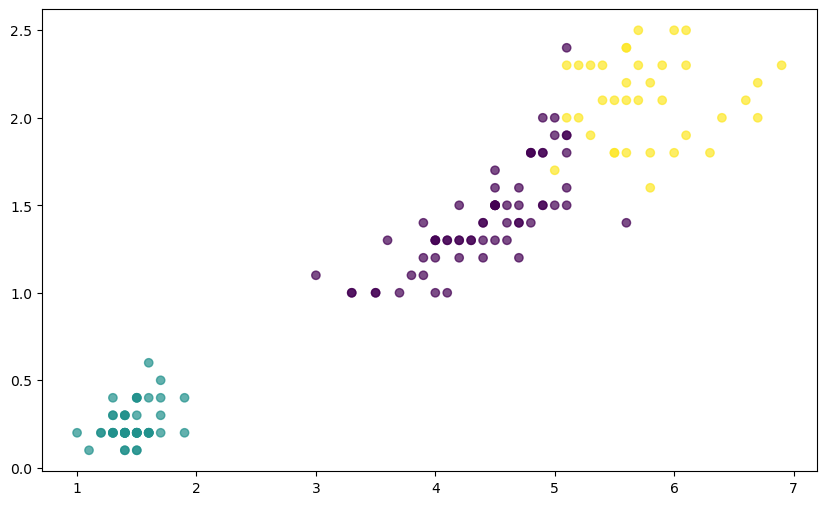

In [27]:
plt.scatter(X["petal_length"], X["petal_width"], c= model1.labels_, cmap= "viridis", alpha = 0.7);


In [28]:
# hangi observation ı hangi kümeye verdiğini görüyorum

In [29]:
clusters = model1.labels_

In [30]:
df["predicted_clusters"] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [31]:
# uzman görüşü sonrası label gelmeli

In [32]:
odf = pd.read_csv("iris.csv") #orjinal data frame (odf)
labels=pd.DataFrame(odf["species"]) # müşteriden gelen label
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [33]:
X["predict_clusters"] =clusters
X["labels"]= labels
X

,sepal_length,sepal_width,petal_length,petal_width,predict_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [34]:
ct = pd.crosstab(X["predict_clusters"], X["labels"])
ct

# 0. labels 49 doğru tahmin ama 15 fazladan tahmin etmiş onlarda yanlış 
# 1.    ''   50  ''     ''
#2.      ''  35  ''     ''   1 yanlış tahmin 14 ünü bilememiş 

labels,setosa,versicolor,virginica
predict_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [35]:
# versicolor":0, "setosa":1,"virginica":2

## ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [36]:
from sklearn.metrics.cluster import adjusted_rand_score

In [37]:
adjusted_rand_score(X.labels, X.predict_clusters) #???????????

0.7311985567707746

## Visualization Clusters

In [38]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

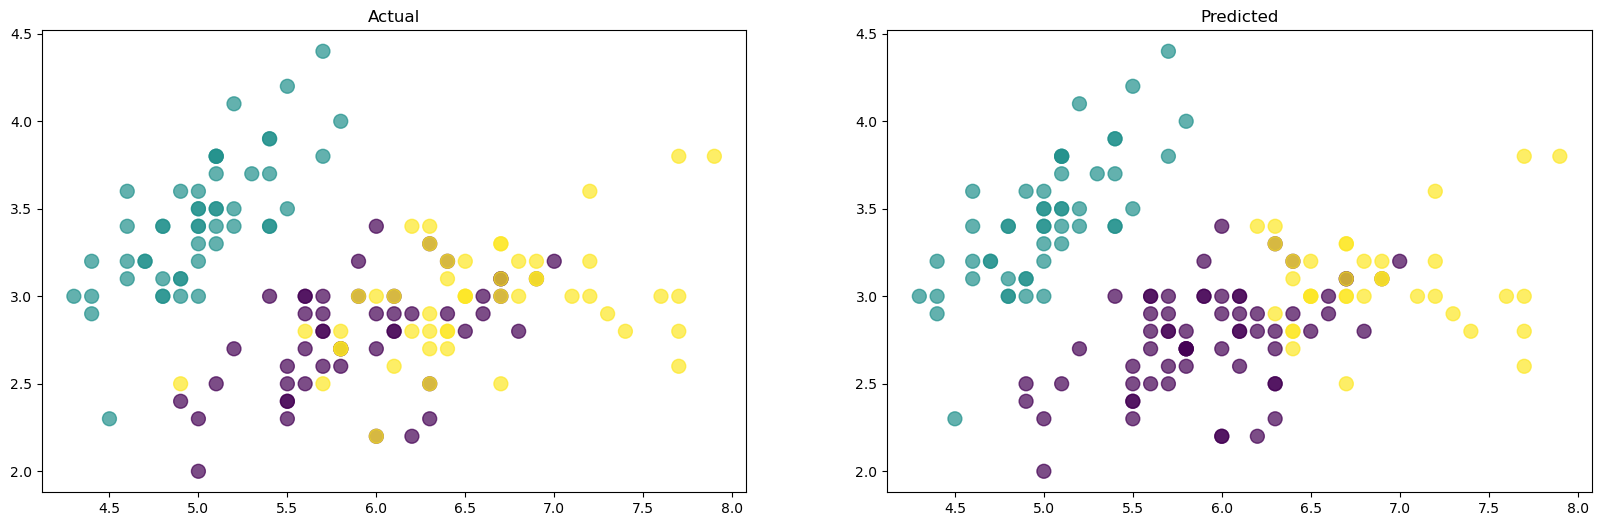

In [39]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

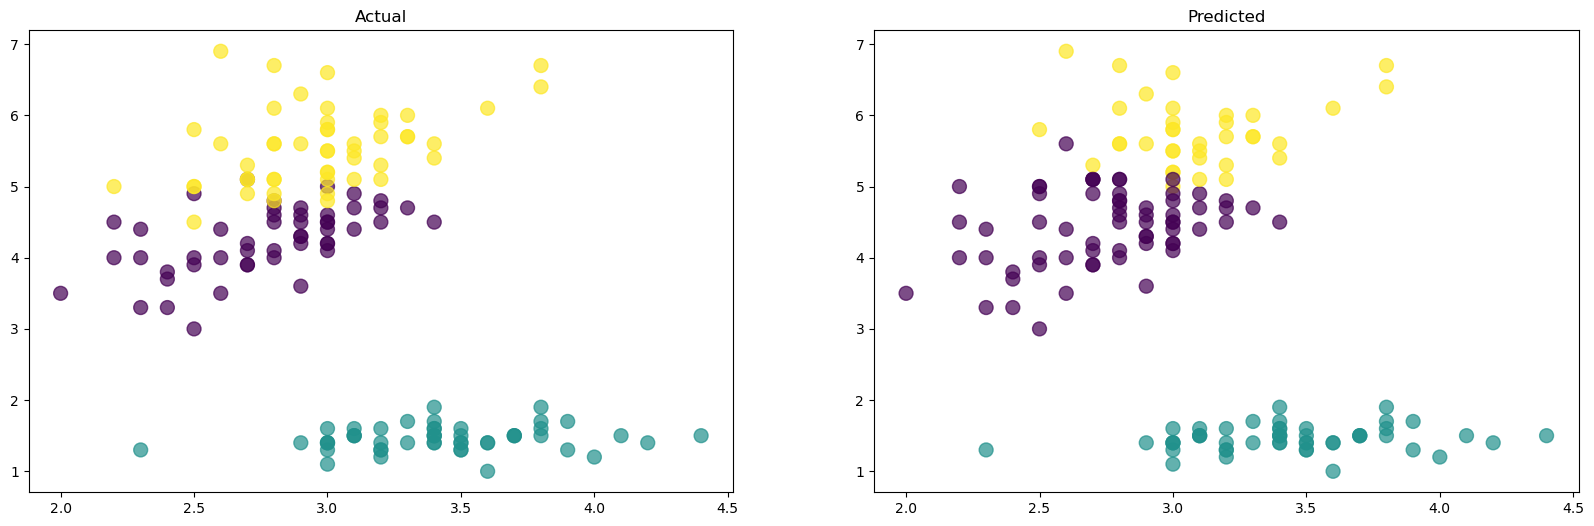

In [40]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

## Remodeling according to discriminating features

In [41]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predict_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [42]:
clus_pred = X.iloc[:, [0, 1, 2, 3, 5]].groupby("labels").mean().T
clus_pred

labels,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


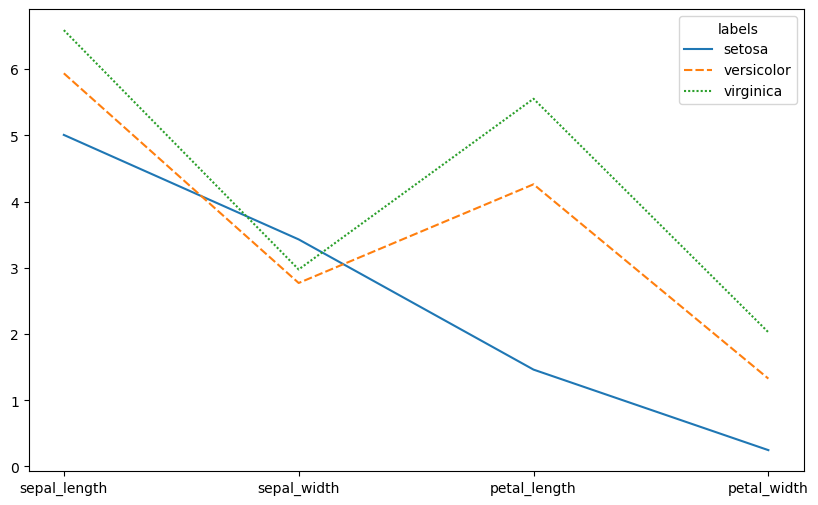

In [43]:
sns.lineplot(data = clus_pred);

<Axes: xlabel='labels', ylabel='petal_width'>

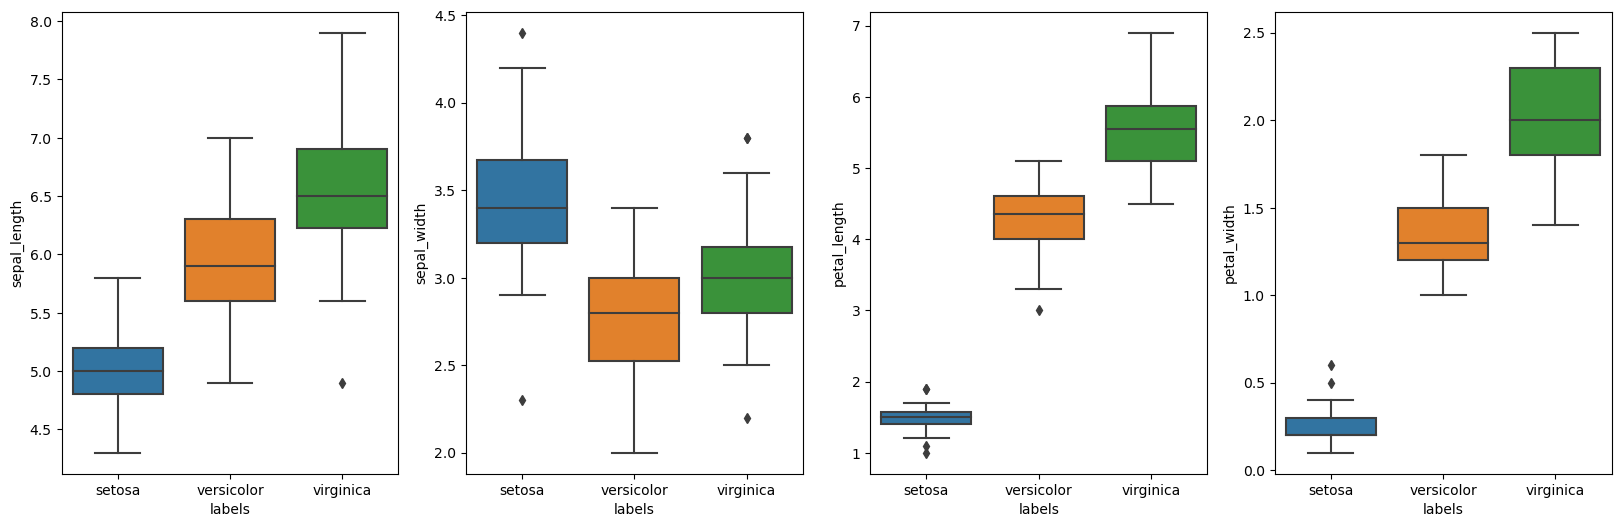

In [44]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = X)

plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = X)

plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = X)

plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = X)

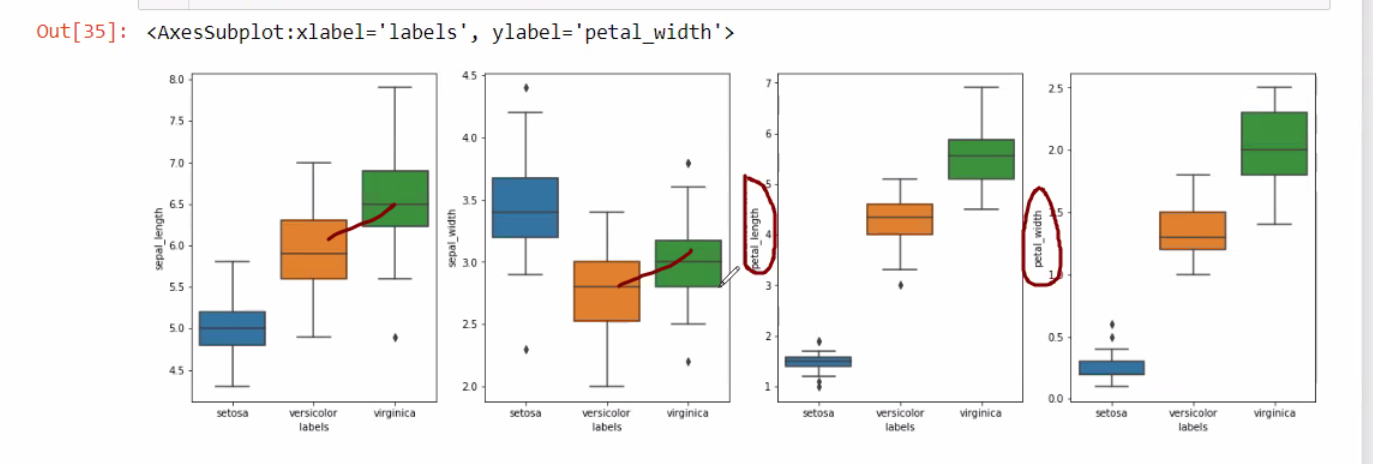

In [45]:
# ortalama çizgileri birbirini kesiyor mu diye bakıyorum 2. yöntem olarak

In [46]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Dendrogram

In [47]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

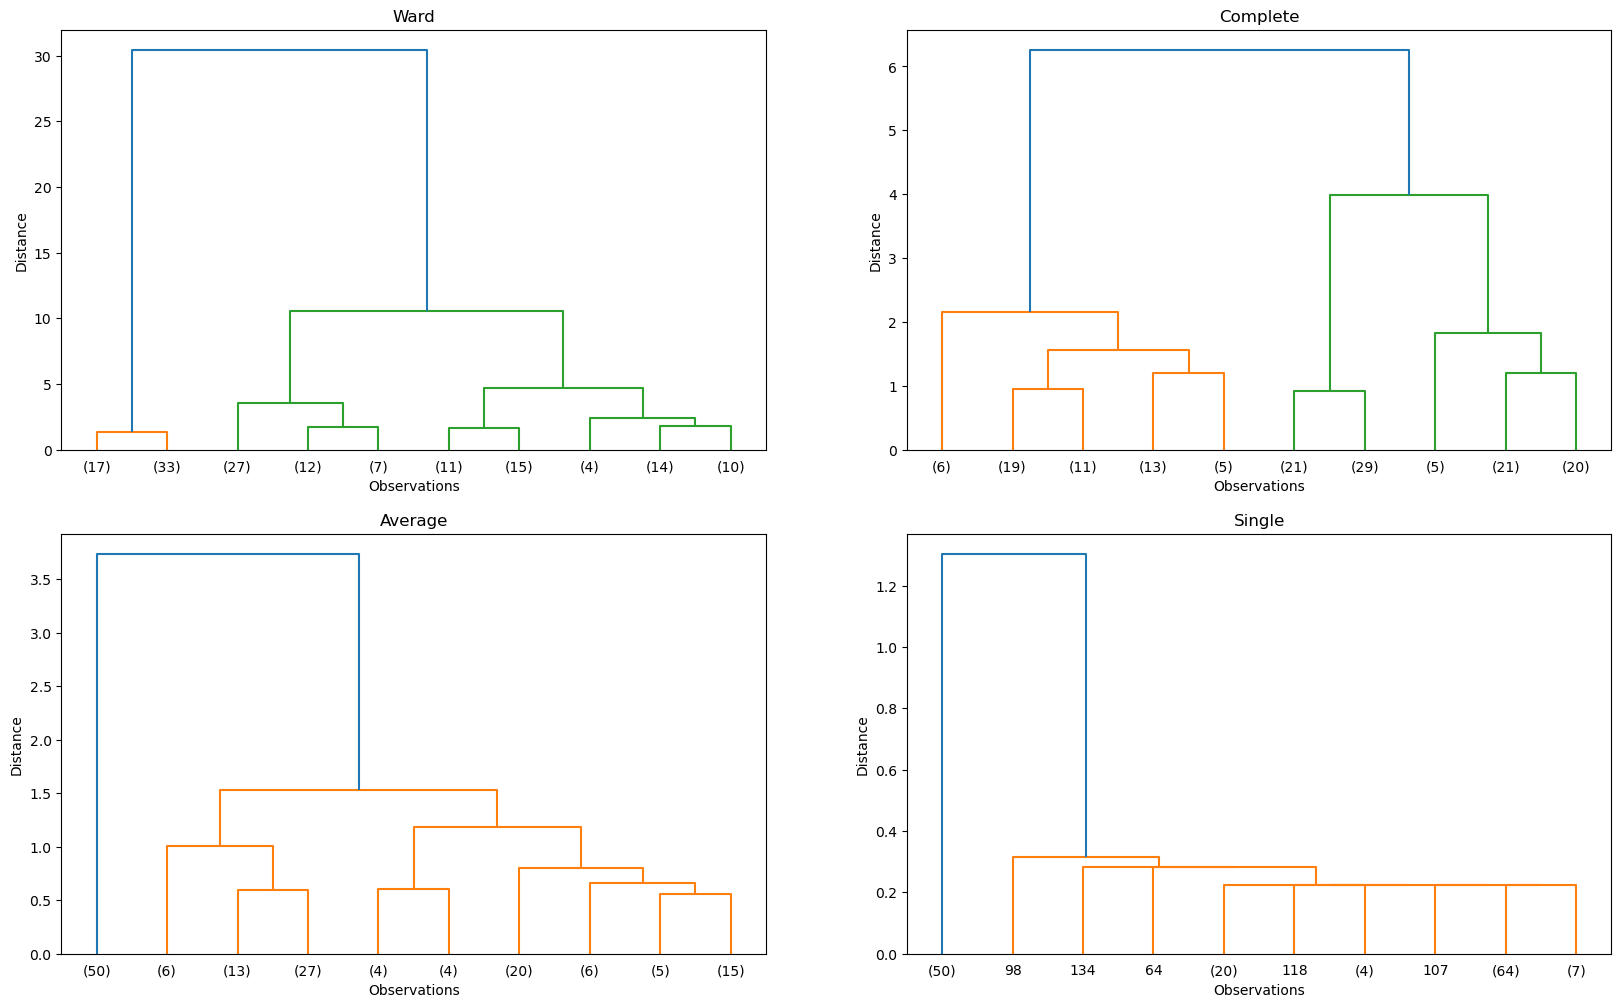

In [48]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### S(Silhouette) Score

In [49]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.7669465622770762
Silhouette Score for 3 clusters: 0.6573949269287823
Silhouette Score for 4 clusters: 0.5895284480910935
Silhouette Score for 5 clusters: 0.5781917218437669
Silhouette Score for 6 clusters: 0.5747380906148477
Silhouette Score for 7 clusters: 0.5830818097709548
Silhouette Score for 8 clusters: 0.5678904784921739
Silhouette Score for 9 clusters: 0.5469910001848306


## Final model

In [50]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model.fit_predict(X2)

# uzmandan gelen destekle "n_clusters=3" diyorum, data 2 söylüyor S(Silhouette) Score ile (Silhouette Score for 2 clusters: 0.7669465622770762)

In [51]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,2,setosa
1,1.4,0.2,2,setosa
2,1.3,0.2,2,setosa
3,1.5,0.2,2,setosa
4,1.4,0.2,2,setosa
...,...,...,...,...
145,5.2,2.3,0,virginica
146,5.0,1.9,0,virginica
147,5.2,2.0,0,virginica
148,5.4,2.3,0,virginica


In [52]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,0,45,1
2,50,0,0


In [53]:
ct

labels,setosa,versicolor,virginica
predict_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [54]:
X2_labels = X2.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

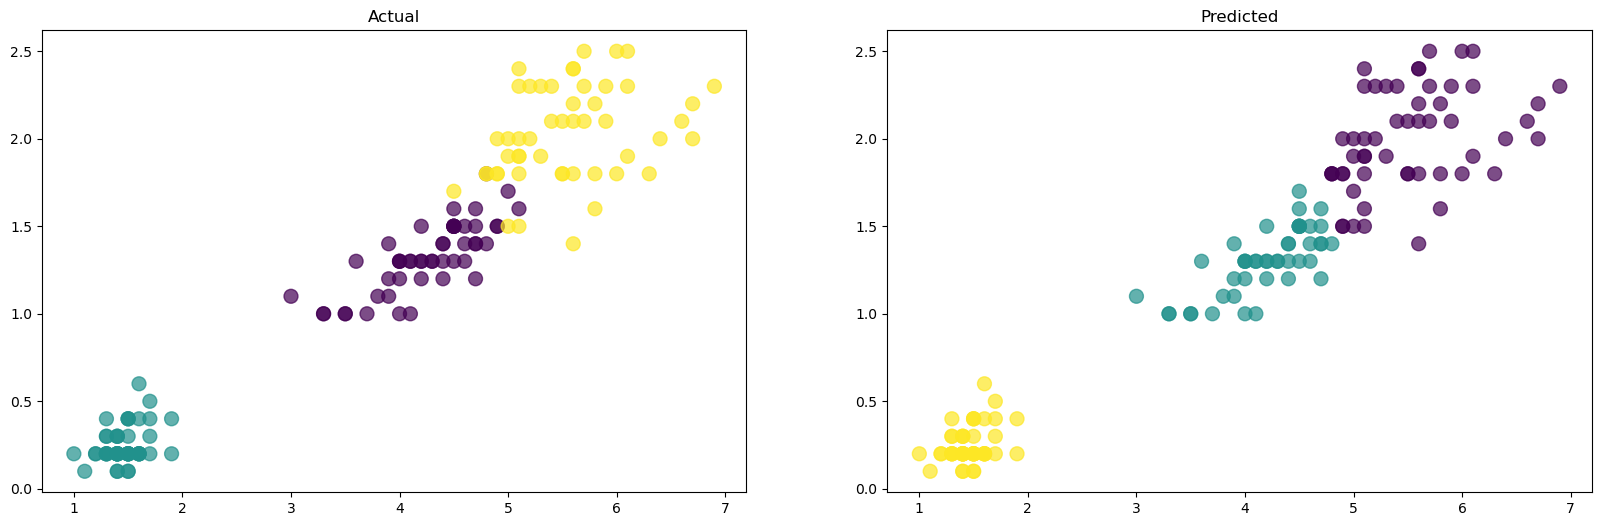

In [55]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

### ARI Score

In [56]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.8857921001989628

## Prediction cluster of new data

In [59]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [60]:
final_model.predict(new_data)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [ ]:
# yeni data gelirse eski datanın altına ekleyip yeniden kuruyorum 